#2Dimentional Fourier Transform

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from IPython import display
import time
import scipy.fftpack
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal

#Changing Frequency
Illustration: Different Spatial Frequencies of an Image & their effect on Resulting Fourier Transform

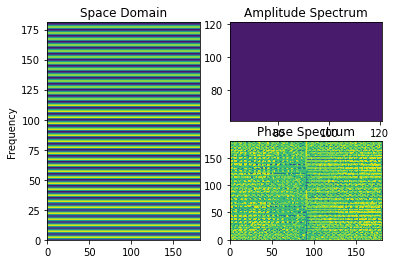

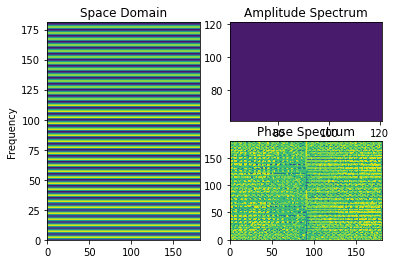

In [11]:
# movie to illustrate frequencies

# specify vector of sine frequencies
sinefreq = np.linspace(.0001,.2,50) # arbitrary units


# leave this fixed for now
sinephas = np.pi/2


# sine wave initializations
lims  = [-91,91]
[x,y] = np.meshgrid(range(lims[0],lims[1]),range(lims[0],lims[1]))
xp    = x*np.cos(sinephas) + y*np.sin(sinephas)


for si in range(0,len(sinefreq)):
    
    # compute sine wave
    img = np.sin( 2*np.pi*sinefreq[si]*xp )
    
    # 2D FFT and extract power and phase spectra
    imgX  = scipy.fftpack.fftshift(scipy.fftpack.fft2(img))
    
    powr2 = np.abs(imgX)
    phas2 = np.angle(imgX)
    
    
    # show original image
    pl.cla() # wipe the figure
    plt.subplot2grid((1,2),(0,0))
    plt.contourf(img)
    plt.title ('Space Domain')
    plt.ylabel('Frequency')
    
    # show amplitude spectrum
    plt.subplot2grid((2,2),(0,1))
    plt.contourf(powr2)
    plt.xlim([61,121])
    plt.ylim([61,121])
    plt.title("Amplitude Spectrum")
    
    # show phase spectrum
    plt.subplot2grid((2,2),(1,1))
    plt.contourf(phas2)
    plt.title("Phase Spectrum")

    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(.01)


Here, the frequency of the Sine Wave is changed over Time & rest of the variables are kept constant.

Obervations: 



*   As the frequency increases, the dots on the Amplitude Spectrum moove farther & farther away from the cetre. [Because centre of this plot corresponds to lower frequencies]
*   The Phase Spectrum is not actually changing. It is just the rounding errors (as explained: when the amplitude is nearly zero, the noise error in the phase increase forefold). So nothing of much sognificance to observe.



What happens when we change the phase of the Sine Wave?

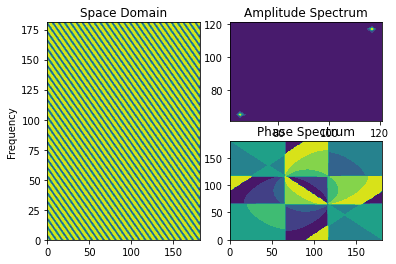

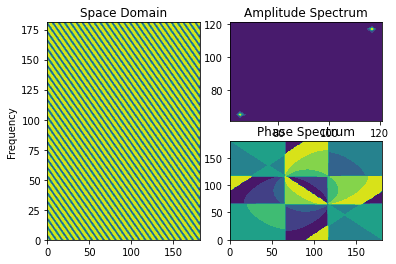

In [12]:
# specify vector of sine frequencies
sinefreq = np.linspace(.0001,.2,50) # arbitrary units


# leave this fixed for now
sinephas = np.pi/4                        #Phase Changes


# sine wave initializations
lims  = [-91,91]
[x,y] = np.meshgrid(range(lims[0],lims[1]),range(lims[0],lims[1]))
xp    = x*np.cos(sinephas) + y*np.sin(sinephas)


for si in range(0,len(sinefreq)):
    
    # compute sine wave
    img = np.sin( 2*np.pi*sinefreq[si]*xp )
    
    # 2D FFT and extract power and phase spectra
    imgX  = scipy.fftpack.fftshift(scipy.fftpack.fft2(img))
    
    powr2 = np.abs(imgX)
    phas2 = np.angle(imgX)
    
    
    # show original image
    pl.cla() # wipe the figure
    plt.subplot2grid((1,2),(0,0))
    plt.contourf(img)
    plt.title ('Space Domain')
    plt.ylabel('Frequency')
    
    # show amplitude spectrum
    plt.subplot2grid((2,2),(0,1))
    plt.contourf(powr2)
    plt.xlim([61,121])
    plt.ylim([61,121])
    plt.title("Amplitude Spectrum")
    
    # show phase spectrum
    plt.subplot2grid((2,2),(1,1))
    plt.contourf(phas2)
    plt.title("Phase Spectrum")

    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(.01)


The plot changes in orientation.

#Changing Phase 
Illustration: Different Phases of an Image & their effect on Resulting Fourier Transform

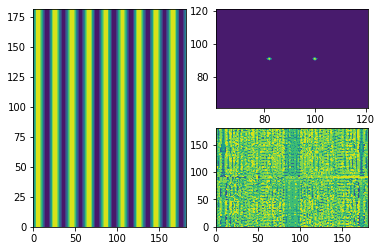

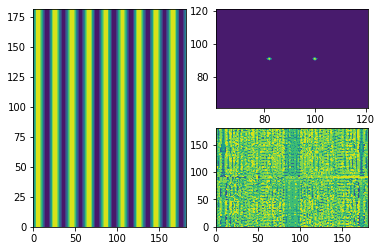

In [13]:
## movie to illustrate phases

# specify vector of sine gradient phases
sinephas = np.linspace(0,np.pi,50) # arbitrary units

# leave this fixed for now
sinefreq = .05


# sine wave initializations
lims  = [-91,91]
[x,y] = np.meshgrid(range(lims[0],lims[1]),range(lims[0],lims[1]))


for si in range(0,len(sinephas)):
    
    # compute sine wave
    xp  = x*np.cos(sinephas[si]) + y*np.sin(sinephas[si])
    img = np.sin( 2*np.pi*sinefreq*xp )
    
    # 2D FFT and extract power and phase spectra
    imgX  = scipy.fftpack.fftshift(scipy.fftpack.fft2(img))
    
    powr2 = np.abs(imgX)
    phas2 = np.angle(imgX)
    
    
    # show original image
    pl.cla() # wipe the figure
    plt.subplot2grid((1,2),(0,0))
    plt.contourf(img)
    
    # show amplitude spectrum
    plt.subplot2grid((2,2),(0,1))
    plt.contourf(powr2)
    plt.xlim([61,121])
    plt.ylim([61,121])
    
    # show phase spectrum
    plt.subplot2grid((2,2),(1,1))
    plt.contourf(phas2)
    
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(.01)

They are rotating clockwise. 

The amplitude is always at the same distance from the origin.

#Changing Spacial Location
Illustration: Different Physical Locations of an Image & their effect on Resulting Fourier Transform

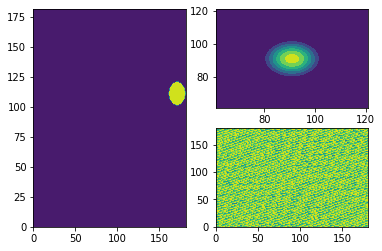

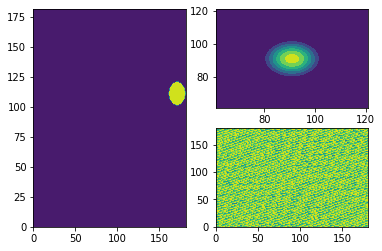

In [14]:
# physical location

width = 20 # width of Gaussian
centlocs = np.linspace(-80,80,50)

for si in range(0,len(centlocs)):
    
    # create Gaussian
    mx = x-centlocs[si]
    my = y-20
    
    gaus2d = np.exp( -( mx**2 + my**2 ) / (2*width**2) )
    img = np.zeros((len(gaus2d),len(gaus2d)))
    img[gaus2d>.9] = 1
    
    # 2D FFT and extract power and phase spectra
    imgX  = scipy.fftpack.fftshift(scipy.fftpack.fft2(img))
    
    powr2 = np.abs(imgX)
    phas2 = np.angle(imgX)
    
    
    # show original image
    pl.cla() # wipe the figure
    plt.subplot2grid((1,2),(0,0))
    plt.contourf(img)
    
    # show amplitude spectrum
    plt.subplot2grid((2,2),(0,1))
    plt.contourf(powr2)
    plt.xlim([61,121])
    plt.ylim([61,121])
    
    # show phase spectrum
    plt.subplot2grid((2,2),(1,1))
    plt.contourf(phas2)
    
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(.01)

Amplitude spectrum is basically remains unchanged.

As the ball moves around the space, the spectral features of the ball remain unchanged. however it is moving in location & that is represented in the phase.